In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

import numpy as np
import matplotlib.pyplot as plt
import random as r

2023-10-01 13:37:41.676482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 13:37:41.722562: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 13:37:41.723158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 13:37:42.614825: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
training_data, testing_data = utils.image_dataset_from_directory(
    "Data/",
    image_size=(100,100),
    seed=123456789,
    validation_split=0.2,
    subset="both",
    color_mode="rgb",
    shuffle=True
)

Found 15376 files belonging to 7 classes.
Using 12301 files for training.
Using 3075 files for validation.


In [3]:
model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [4]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [5]:

history = model.fit(training_data, epochs=10, validation_data=testing_data)

Epoch 1/10


/home/krug/.local/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


385/385 [==============================] - 81s 208ms/step - loss: 1.9520 - accuracy: 0.1817 - val_loss: 1.9036 - val_accuracy: 0.2075
Epoch 2/10
385/385 [==============================] - 82s 212ms/step - loss: 1.8600 - accuracy: 0.2438 - val_loss: 1.8501 - val_accuracy: 0.2641
Epoch 3/10
385/385 [==============================] - 80s 208ms/step - loss: 1.7917 - accuracy: 0.2945 - val_loss: 1.8153 - val_accuracy: 0.2859
Epoch 4/10
385/385 [==============================] - 80s 208ms/step - loss: 1.7143 - accuracy: 0.3367 - val_loss: 1.7818 - val_accuracy: 0.3122
Epoch 5/10
385/385 [==============================] - 80s 207ms/step - loss: 1.5866 - accuracy: 0.3954 - val_loss: 1.8330 - val_accuracy: 0.3167
Epoch 6/10
385/385 [==============================] - 79s 204ms/step - loss: 1.4070 - accuracy: 0.4718 - val_loss: 1.9478 - val_accuracy: 0.3392
Epoch 7/10
385/385 [==============================] - 79s 204ms/step - loss: 1.1910 - accuracy: 0.5617 - val_loss: 2.1486 - val_accuracy: 0.3

In [6]:
probabilities = model.predict(testing_data)
predictions = np.argmax(probabilities, axis=1)

97/97 [==============================] - 5s 47ms/step


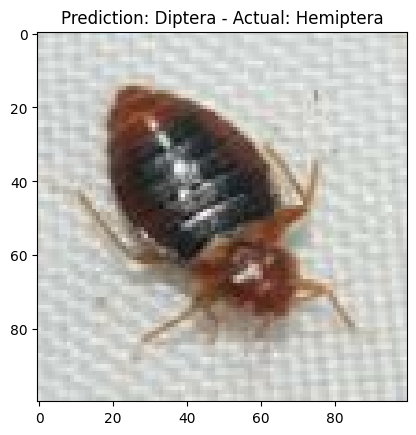

In [47]:
t_data = testing_data.repeat()
skips = r.randint(0, len(testing_data) - 1)
rt_data = t_data.skip(skips)

for image, label in rt_data.take(1):
    pass

labels = ["Araneae", "Coleoptera", "Diptera", 
          "Hemiptera", "Hymenoptera", "Lapidoptera",
          "Odonata"]

index = r.randint(0, len(label) - 1)

img = image[index] / 255

plt.imshow(img)
plt.title(f"Prediction: {labels[predictions[skips * len(label) + index]]} - Actual: {labels[label[index]]}")
plt.show()